In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
import numpy as np
%matplotlib inline

from category_encoders import *
from IPython.display import display
import scipy.stats as sp
import datetime as dt
import re
#import categorical_embedder
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler, StandardScaler
le = LabelEncoder()
sns.set(rc={'figure.figsize':(14, 8)})

In [262]:
datainput = pd.read_csv(r"C:\Users\Ighdaro Emwinghare\Downloads\filtered_req_calls.csv")

C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [263]:
datainput.T

,0,1,2,3,4,5,6,7,8,9,...,2369662,2369663,2369664,2369665,2369666,2369667,2369668,2369669,2369670,2369671
product_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WC3a8IAD,a00G000000WmJIEIA3
date,2018-10-05,2020-07-14,2020-07-21,2020-07-13,2020-06-29,2020-07-10,2020-07-10,2020-07-03,2020-07-08,2020-07-13,...,2017-07-18,2018-04-16,2017-03-20,2017-01-12,2017-01-12,2016-11-10,2018-03-05,2018-09-11,2018-04-13,2017-11-02
geo_country,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,...,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP,ESP
content_category,NaN,NaN,NaN,NaN,Safety,Safety,AbbVie or Brand Value,Safety,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content_message_local,NaN,NaN,NaN,NaN,Venclyxto tiene un perfil de seguridad predeci...,Venclyxto tiene un perfil de seguridad predeci...,"FTD se traduce en: - Eas, - riesgo de aparició...",Venclyxto tiene un perfil de seguridad predeci...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
content_message_global,NaN,NaN,NaN,NaN,VEN-based regimens have established/manageable...,VEN-based regimens have established/manageable...,VEN regimens are the only chemo-free FTD regim...,VEN-based regimens have established/manageable...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Environment_CLL_KAM_ES,Venetoclax_AML_MED_ES
indication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
therapeutic_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco,Hemato/Onco
account_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
#since we are interested in analyizing different product_ids, it is necessary to drop rows that contain null as product_id
data = datainput
data  = data.dropna(axis=0, subset=['product_id'])

In [265]:
data.isnull().sum()

product_id                      0
date                            0
geo_country                     0
content_category          2238795
content_message_local     2238795
content_message_global    2238795
product                         0
indication                 551394
therapeutic_area           190606
account_id                1008886
segment_quant             1304636
segment_qual              1568067
touchpoint_channel_clm          0
measure_source                  0
dtype: int64

In [266]:
print(dict(data['product_id'].value_counts()))

{'a00G000000URPpMIAX': 204442, 'a00G000000VfomnIAB': 201880, 'a00G000000URPplIAH': 178445, 'a00G000000URPpNIAX': 157414, 'a00G000000URPpHIAX': 152666, 'a00G000000URPpkIAH': 112207, 'a00G000000URPpGIAX': 104640, 'a00G000000URPpJIAX': 102859, 'a00G000000URPpnIAH': 101872, 'a00G000000URPppIAH': 94134, 'a00G000000URPpOIAX': 66973, 'a00G000000URsmCIAT': 61428, 'a00G000000URsmBIAT': 47585, 'a001v00001cTVBIAA4': 47464, 'a00G000000Ux9H6IAJ': 45956, 'a000Y00000DLyrGQAT': 45722, 'a00G000000WC3H4IAL': 44031, 'a001v00001cTVB8AAO': 39493, 'a00G000000URsmDIAT': 29959, 'a00G000000URPpLIAX': 29281, 'a00G000000URPpmIAH': 27662, 'a00G000000URPpoIAH': 26877, 'a001v000021iYhHAAU': 23272, 'a00G000000URPpIIAX': 20243, 'a001v00001wbtlnAAA': 19103, 'a00G000000UyIoSIAV': 19068, 'a00G000000URPpKIAX': 18142, 'a00G000000URPpXIAX': 16860, 'a00G000000URsmEIAT': 15179, 'a001v00001cTVAVAA4': 13811, 'a000Y00000HX2tsQAD': 12542, 'a00G000000WC3a7IAD': 12072, 'a00G000000URPpeIAH': 8859, 'a00G000000UymzOIAR': 8762, 'a000Y

In [267]:
data['monthyear'] = pd.to_datetime(datainput['date']).dt.to_period('M')

C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [268]:
#fill missing values with specific indicator.
data['content_category'] = data['content_category'].fillna('Unknown')
data['touchpoint_channel_clm'] = data['touchpoint_channel_clm'].fillna('Unknown')
data['content_message_local'] = data['content_message_local'].fillna('NoMessage')
data['content_message_global'] = data['content_message_global'].fillna('NoMessage')

C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [269]:
dict(data['content_message_local'].value_counts())

{'NoMessage': 2238795,
 'Aclaramiento completo duradero': 5851,
 'Facilidad': 5433,
 'Seguridad': 5201,
 'Ibrutinib es una buena ocpion de rescate para los pac que progresan tras Ven': 1594,
 'Campaña Nada lo cambia todo': 648,
 'Compromiso de Abbvie con la hematología': 524,
 'Perspectivas en LLC': 433,
 'Adherencia': 404,
 'Aclaramiento duradero con independencia de las características basales': 391,
 'Aclaramiento duradero superior a Stelara': 360,
 'Eficacia y tolerabilidad vs otros MOAs': 228,
 'Local Key Message does not apply': 216,
 'VenR es la única alternativa que permite lFTD a los 2 años: - coste': 209,
 '1º y único inhibidor potente y selectivo de BCL2': 197,
 'Venclyxto tiene un perfil de seguridad predecible y manejable': 160,
 '87% de los pac. con EMR-, permanecieron libres de progresión tras 4 años': 132,
 'Más de la mitad de los pacientes con VenR continúan sin progresar a los 4 años': 125,
 'FTD se traduce en: - Eas, - riesgo de aparición de resist, + adherencia, + Q

In [270]:
dict(data['content_message_global'].value_counts())

{'NoMessage': 2238795,
 'Durable complete clearance': 5851,
 'Reliable 3-month dosing regardless of baseline characteristics': 5824,
 'SKYRIZI/IL-23 MOA': 5441,
 'Global Key message does not apply': 2118,
 'VEN regimens are the only chemo-free FTD regimens & offer multiple benefits': 765,
 'Nothing is Everything/campaign summary': 648,
 'The potential of SKYRIZI can only be achieved if patients adhere to\xa0treatment': 404,
 'Durable clearance superior to Stelara': 360,
 'MURANO: The PFS benefit of VEN+R vs BR was sustained at 4-year follow-up': 224,
 'Global Key Message does not apply': 216,
 'VEN is a selective, oral, BCL-2 inhibitor that restores the process of apoptosis': 197,
 'VEN-based regimens have established/manageable safety profile in CLL  trials': 160,
 'Achieving deep response is important & may be associated with improved outcomes': 132,
 'MURANO: VEN+R induced deep responses in many patients': 89,
 'AC is specifically designed for SKYRIZI patients to optimize their\xa0a

In [271]:
#reform the content_message_concat by combining content_message_Local, 'sgm' and content_message_global
data['tactic'] = data['content_message_local'] + ' SGM ' + data['content_message_global']

C:\Users\Ighdaro Emwinghare\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [272]:
data['tactic'].nunique()

26

In [273]:
data['tactic'].value_counts()

NoMessage SGM NoMessage                                                                                                                                           2238795
Aclaramiento completo duradero SGM Durable complete clearance                                                                                                        5851
Facilidad SGM Reliable 3-month dosing regardless of baseline characteristics                                                                                         5433
Seguridad SGM SKYRIZI/IL-23 MOA                                                                                                                                      5201
Ibrutinib es una buena ocpion de rescate para los pac que progresan tras Ven SGM Global Key message does not apply                                                   1594
Campaña Nada lo cambia todo SGM Nothing is Everything/campaign summary                                                                                

In [274]:
data.isnull().sum()/len(data)

#99% values in tactic, content_category, content_message_local and content_message_global are missing.

product_id                0.000000
date                      0.000000
geo_country               0.000000
content_category          0.000000
content_message_local     0.000000
content_message_global    0.000000
product                   0.000000
indication                0.243841
therapeutic_area          0.084291
account_id                0.446156
segment_quant             0.576944
segment_qual              0.693440
touchpoint_channel_clm    0.000000
measure_source            0.000000
monthyear                 0.000000
tactic                    0.000000
dtype: float64

In [275]:
data.columns

Index(['product_id', 'date', 'geo_country', 'content_category',
       'content_message_local', 'content_message_global', 'product',
       'indication', 'therapeutic_area', 'account_id', 'segment_quant',
       'segment_qual', 'touchpoint_channel_clm', 'measure_source', 'monthyear',
       'tactic'],
      dtype='object')

In [276]:
"""Helper Functions"""


def get_cat_feats(data=None):
    '''
    Returns the categorical features in a data set
    Parameters:
    -----------
        data: DataFrame or named Series 
    Returns:
    -------
        List
            A list of all the categorical features in a dataset.
    it is used as a helper function for most of the functions to get categorical variables
    '''
    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    cat_features = data.select_dtypes(include=['object']).columns

    return list(cat_features)
def get_num_feats(data=None):
    '''
    Returns the numerical features in a data set
    Parameters:
    -----------
        data: DataFrame or named Series 
    Returns:
    -------
        List:
            A list of all the numerical features in a dataset.
    it is used as a helper function for most of the functions to get categorical variables
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    num_features = data.select_dtypes(include=numerics).columns

    return list(num_features)
def get_unique_counts(data=None):
    '''
    Gets the unique count of categorical features in a data set.
    Parameters
    -----------
        data: DataFrame or named Series 
    Returns
    -------
        DataFrame or Series
            Unique value counts of the features in a dataset.
    it is used as a helper function in the describe function to get the count of unique values in the columns 
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    features = get_cat_feats(data)
    temp_len = []

    for feature in features:
        temp_len.append(len(data[feature].unique()))
        
    df = list(zip(features, temp_len))
    df = pd.DataFrame(df, columns=['Feature', 'Unique Count'])
    df = df.style.bar(subset=['Unique Count'], align='mid')
    return df
def display_missing(data=None, plot=False):
    '''
    Display missing values as a pandas dataframe.
    Parameters
    ----------
        data: DataFrame or named Series
        plot: bool, Default False
            Plots missing values in dataset as a heatmap
    
    Returns
    -------
        Matplotlib Figure:
            Heatmap plot of missing values
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    df = data.isna().sum()
    df = df.reset_index()
    df.columns = ['features', 'missing_counts']

    missing_percent = round((df['missing_counts'] / data.shape[0]) * 100, 1)
    df['missing_percent'] = missing_percent

    if plot:
        plot_missing(data)
        return df
    else:
        return df
    
def cat_summarizer(data, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Parameters:
    ---------------------------
        dataframe: pandas dataframe
        x: str.
            horizontal axis to plot the labels of categorical data, y would be the count.
        y: str. 
            vertical axis to plot the labels of categorical data, x would be the count.
        hue: str. i
            if you want to compare it another variable (usually the target variable)
        palette: array, list.
            Colour of the plot
    Returns:
    ----------------------
        Quick Stats of the data and also the count plot
        
        it is used in the describe function
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = data[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=data, palette=palette)
    plt.show()
    
def _space():
    '''it is used in  most functions to add space. this makes result more presentation'''
    print('\n')
def _match_date(data):
    '''
        Return a list of columns that matches the DateTime expression
    '''
    mask = data.sample(20).astype(str).apply(lambda x : x.str.match(r'(\d{2,4}-\d{2}-\d{2,4})+').all())
    return set(data.loc[:, mask].columns)


def display_rows(data,num=2):
    '''
    Displays the required number of rows
    it is used in the describe function
    '''
    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")

    return data.head(num)

def plot_missing(data=None):
    '''
    Plots the data as a heatmap to show missing values
    Parameters
    ----------
        data: DataFrame, array, or list of arrays.
            The data to plot.
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    sns.heatmap(data.isnull(), cbar=True)
    plt.show()
    
def class_count(data=None, features=None, plot=False, save_fig=False):
    '''
    Displays the number of classes in a categorical feature.
    Parameters:
    
        data: Pandas DataFrame or Series
            Dataset for plotting.
        features: Scalar, array, or list. 
            The categorical features in the dataset, if None, 
            we try to infer the categorical columns from the dataframe.
        plot: bool, Default False.
            Plots the class counts as a barplot
        save_fig: bool, Default False.
            Saves the plot to the current working directory.
    it is used in the describe function
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    if features is None:
        features = get_cat_feats(data)

                        

    for feature in features:
        if data[feature].nunique() > 15:
            print("Unique classes in {} too large".format(feature))
        else:
            print('Class Count for', feature)
            display(pd.DataFrame(data[feature].value_counts()))

    if plot:
        countplot(data, features, save_fig=save_fig)
        
def get_date_cols(data=None):
    '''
    Returns the Datetime columns in a data set.
    Parameters
    ----------
        data: DataFrame or named Series
            Data set to infer datetime columns from.
        convert: bool, Default True
            Converts the inferred date columns to pandas DateTime type
    Returns:
    -------
        List
         Date column names in the data set
    use in the describe function to set date columns to datetime datatype in utc
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    #Get existing date columns in pandas Datetime64 format
    date_cols = set(data.dtypes[data.dtypes == 'datetime64[ns, UTC]'].index)
    #infer Date columns 
    date_cols = date_cols.union(_match_date(data))
       
    return date_cols

def bivariate_stats(data):
    '''Returns the contingency table and chi2 contingency test result between columns in the dataframe
        
        it is used in the describe function for categorical features analysis 
    
    
    '''
    cat_feats = get_cat_feats(data=data)
    counter = 1
    try:
        while counter<(len(cat_feats)):
            val1 = get_cat_feats(data=datainput)[counter - 1]
            val2 = get_cat_feats(data=datainput)[counter]
            if (data[val1].nunique() > 15) or (data[val2].nunique() > 15):
                print('Number of unique values too large')
            else:
                freqtab = pd.crosstab(data[val1], data[val2])
                print("Frequency table")
                print("============================")
                print(freqtab)
                print("============================")
                chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
                print("ChiSquare test statistic: ",chi2)
                print("p-value: ",pval)
                _space()
            counter= counter+1
    except:
        pass
    
def bivariate_stats_target(data, target):
    
    '''Returns the contingency table and chi2 contingency test result between columns and the target variable in the dataframe
        
        
        Parameters
    ----------
        data: DataFrame or named Series
            Data set to infer datetime columns from.
        target: the target variable in form of string

        
        it is used in the describe function for categorical features analysis of the relationship between the target variable 
        and other categorical features
    
    
    '''
    cat_feats = get_cat_feats(data=data)
    for i in cat_feats:
        if (data[i].nunique() > 20):
            print('Number of Unique values too large')
        else:
            freqtab = pd.crosstab(data[i], data[target])
            print("Frequency table")
            print("============================")
            print(freqtab)
            print("============================")
            chi2, pval, dof, expected = sp.chi2_contingency(freqtab)
            print("ChiSquare test statistic: ",chi2)
            print("p-value: ",pval)
            _space()
            
def describe(data=None, name='', date_cols=None, show_categories=False, plot_missing=False, target = None):
    '''
    Calculates statistics and information about a data set. Information displayed are
    shapes, size, number of categorical/numeric/date features, missing values,
    dtypes of objects, correlation analysis, contigency analysis etc.
    Parameters:
    --------------------
        data: Pandas DataFrame
            The data to describe.
        name: str, optional
            The name of the data set passed to the function.
        date_cols: list/series/array
            Date column names in the data set.
        show_categories: bool, default False
            Displays the unique classes and counts in each of the categorical feature in the data set.
        plot_missing: bool, default True
            Plots missing values as a heatmap
        target: the target variable in the dataframe
    Returns:
    -------
        None
        
        This function is stand alone use for quick statistical exploration of the data.
    '''
    
    if data is None:
        raise ValueError("data: Expecting a DataFrame or Series, got 'None'")

    ## Get categorical features
    cat_features = get_cat_feats(data)
    
    #Get numerical features
    num_features = get_num_feats(data)

    print('First five data points')
    display(data.head())
    _space()

    print('Random five data points')
    display(data.sample(5))
    _space()

    print('Last five data points')
    display(data.tail())
    _space()

    print('Shape of {} data set: {}'.format(name, data.shape))
    _space()

    print('Size of {} data set: {}'.format(name, data.size))
    _space()

    print('Data Types')
    print("Note: All Non-numerical features are identified as objects in pandas")
    display(pd.DataFrame(data.dtypes, columns=['Data Type']))
    _space()
    
    date_cols = get_date_cols(data)
    if len(date_cols) is not 0:
        print("Column(s) {} should be in Datetime format. Use the [to_date] function to convert to Pandas Datetime format".format(date_cols))
        _space()

    print('Numerical Features in Data set')
    print(num_features)
    _space()

    print('Categorical Features in Data set')
    display(cat_features)
    _space()

    print('Statistical Description of Columns')
    display(data.describe())
    _space()
    
    print('Description of Categorical Features')
    if cat_features != None:
        display(data.describe(include=[np.object, pd.Categorical]).T)
        _space()
          
    print('Unique class Count of Categorical features')
    display(get_unique_counts(data))
    _space()

    if show_categories:     
        print('Classes in Categorical Columns')
        print("-"*30)
        class_count(data, cat_features)
        _space()

    print('Missing Values in Data')
    display(display_missing(data))
    _space()
  
    print('Pearson Correlation')
    print(data.corr())
    _space()
    
    print('Kendall Correlation')
    print(data.corr(method='kendall'))
    _space()
    
    print('Spearman Correlation')
    print(data.corr(method='spearman'))
    _space()
    
    print('Bivariant Stats between categorical features')
    print(bivariate_stats(data))
    _space()
    if target is not None:
        print('Bivariant Stats between cat feats and target variable')
        print(bivariate_stats_target(data, target))
        _space()
    print('')
    

def drop_missing(data=None, percent=99):
    '''
    Drops missing columns with [percent] of missing data.
    Parameters:
    -------------------------
        data: Pandas DataFrame or Series.
        percent: float, Default 99
            Percentage of missing values to be in a column before it is eligible for removal.
    Returns:
    ------------------
        Pandas DataFrame or Series.
    It can be used alone. It also used in deal_with_missing_value function.
    
    This function is used in the deal_with_missing_value function.
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")
    
    missing_percent = (data.isna().sum() / data.shape[0]) * 100
    cols_2_drop = missing_percent[missing_percent.values >= percent].index
    print("Dropped {}".format(list(cols_2_drop)))
    #Drop missing values
    df = data.drop(cols_2_drop, axis=1)
    return df

def fill_missing_cats(data=None, cat_features=None, missing_encoding=None, missing_col=False):
    '''
    Fill missing values using the mode of the categorical features.
    Parameters:
    ------------------------
        data: DataFrame or name Series.
            Data set to perform operation on.
        cat_features: List, Series, Array.
            categorical features to perform operation on. If not provided, we automatically infer the categoricals from the dataset.
        missing_encoding: List, Series, Array.
            Values used in place of missing. Popular formats are [-1, -999, -99, '', ' ']
        missin_col: bool, Default True
      Creates a new column to capture the missing values. 1 if missing and 0 otherwise. This can sometimes help a machine learning model.
      
      This function is used in the deal_with_missing_value function.
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")

    if cat_features is None:
        cat_features = get_cat_feats(data)

    df = data.copy()
    #change all possible missing values to NaN
    if missing_encoding is None:
        missing_encoding = ['', ' ', -99, -999]

    df.replace(missing_encoding, np.NaN, inplace=True)
    
    for feat in cat_features:
        if missing_col:
            df[feat + '_missing_value'] = (df[feat].isna()).astype('int64')
        most_freq = df[feat].mode()[0]
        df[feat] = df[feat].replace(np.NaN, most_freq)
    
    return df

def fill_missing_num(data=None, num_features=None, method='mean', missing_col=False):
    '''
    fill missing values in numerical columns with specified [method] value
    Parameters:
        ------------------------------
        data: DataFrame or name Series.
            The data set to fill
        features: list.
            List of columns to fill
        method: str, Default 'mean'.
            method to use in calculating fill value.
        missing_col: bool, Default True
          Creates a new column to capture the missing values. 1 if missing and 0 otherwise. This can sometimes help a machine learning model.
          
          This function is used in the deal_with_missing_value function.
    '''
    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")
    
    if num_features is None:
        num_features = get_num_feats(data)
        #get numerical features with missing values
        temp_df = data[num_features].isna().sum()
        features = list(temp_df[num_features][temp_df[num_features] > 0].index)
        
    df = data.copy()
    for feat in features:
        if missing_col:
            df[feat + '_missing_value'] = (df[feat].isna()).astype('int64')
        if method is 'mean':
            mean = df[feat].mean()
            df[feat].fillna(mean, inplace=True)
        elif method is 'median':
            median = df[feat].median()
            df[feat].fillna(median, inplace=True)
        elif method is 'mode':
            mode = df[feat].mode()[0]
            df[feat].fillna(mode, inplace=True)
        else:
            raise ValueError("method: must specify a fill method, one of [mean, mode or median]'")
    return df

def deal_with_missing_value(data, percent=70):
    """
    this function automatically take care of missing values.
        It fills the missing values in categorical variables with mode of the particular column
        and fills the missing value numerical variables with mean of the particular column.
        It automatically drops columns with more than 70% missing values except when set otherwise.
        
        This function is used in the feature_preprocessing function to deal with missing values. It can also be used alone.
        """
    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")
    df1 = drop_missing(data=data, percent=percent)
    df2 = fill_missing_cats(data=df1)
    df = fill_missing_num(data=df2)
    return df

def drop_redundant(data):
    '''
    Removes features with the same value in all cell. Drops feature If Nan is the second unique class as well.
    Parameters:
    -----------------------------
        data: DataFrame or named series.
    
    Returns:
        DataFrame or named series.
    This function is used in the feature_processing function.
    '''

    if data is None:
        raise ValueError("data: Expecting a DataFrame/ numpy2d array, got 'None'")
    
    #get columns
    cols_2_drop = _nan_in_class(data)
    print("Dropped {}".format(cols_2_drop))
    df = data.drop(cols_2_drop, axis=1)
    return df
def _nan_in_class(data):
    """helper function for drop_redundant function"""
    cols = []
    for col in data.columns:
        if len(data[col].unique()) == 1:
            cols.append(col)

        if len(data[col].unique()) == 2:
            if np.nan in list(data[col].unique()):
                cols.append(col)

    return cols

#Label Encoding for object to numeric conversion
def binaryencoder(data):
    """To avoid the curse of dimensionality, this function only encodes categorical features with less than 7 unique values
    
        This function can be used alone. It is also used in the encode_data function.
        
        It is the default method for encoding categorical variables with unique value less than four in the encode_data function.
        
        explanation: It is similar to onehot encoding but gives lesser dimensions, making it a better option. 
                    It converts the unique entry into binary combination and then creates column using binary hashing.
    """
    features = get_cat_feats(data=data)
    cols = []
    for feature in features:
        if data[feature].nunique() < 7:
            cols.append(feature)
        
    enc = BinaryEncoder(cols=cols).fit(data)
    data = enc.transform(data)
    return data

def onehotencoder(data):
    """To avoid the curse of dimensionality, this function only encodes categorical features with less than 4 unique values
    
        This function can be used alone. It is also used in the encode_data function
        
    The onehotencoder is only used when the number of unique value is less than four to avoid the curse of dimensionality.
    If encode_data method parameter is set to 'onehotencode' this is what is used in encoding categorical variables with 
    number of unique values less than 4.
    
    explanation: it is used mostly for nominal variables such that a binary combination of the unique values are set as new columns
                    in the dataset.
    """
    features = get_cat_feats(data=data)
    cols = []
    for feature in features:
        if data[feature].nunique() < 4:
            cols.append(feature)
        
    enc = OneHotEncoder(cols=cols).fit(data)
    data = enc.transform(data)
    return data

def labelencoder(data):
    """
    This function can be used alone. It is also used in the encode_data function.
    
    It is used for columns that has more than 3 unique values. Such columns are treated as ordinal variables. 
    
    Explanation: Label encoders are ordinal encoders that encode unique values as continuous intergers.
    
    """
    features = get_cat_feats(data=data)
    for feat in features:
        data[feat] = le.fit_transform(data[feat].astype(str))
    return data

def sumencoder(data):
    """
    This function can be used alone. It is also used in the encode_data function.
    
    The sumencoder is only used when the number of unique value is less than four to avoid the curse of dimensionality.
    If encode_data method parameter is set to 'sumencode' this is what is used in encoding categorical variables with 
    number of unique values less than 4.
    
    explanation: it is similar to one-hot encoding but the difference is that in sum encoding one value is taken as '-1'
                and it is not compared to other value.
    """

    features = get_cat_feats(data=data)
    cols = []
    for feature in features:
        if data[feature].nunique() < 4:
            cols.append(feature)
    enc = SumEncoder(cols = cols).fit_transform(data)
    data = enc
    return data

def catboostencoder(data, target):
    '''Data inputs must not be string
        This function is used alone. It is not called by any other function.
        
        it uses the catboost tree model in properly encoding categorical features.
    
        explanation: a target encoder. It uses the target variable in encoding the categorical variables. 
        It is more accurate than most encoding methods.
    '''
    X = data.drop(target, axis=1)
    y = data[target]
    features = get_cat_feats(data=X)
    enc = CatBoostEncoder(cols=features).fit(X,y)
    data = enc.transform(X, y)
    return data

def hashencoder(data):
    '''
         This function can be used alone. It is also used in the encode_data function.
    
        The hashencoder is only used when the number of unique value is less than four to avoid the curse of dimensionality.
        If encode_data method parameter is set to 'hashencode' this is what is used in encoding categorical variables with 
        number of unique values less than 4.

        explanation: Feature hashing maps each category in a categorical feature to an integer within a predetermined range
    
                        The size of the output dimensions is controlled by the variable n_components.
    '''    
    
    cols = get_cat_feats(data)
    new_col = []
    for i in cols:
        string = str(data[i][0]) + str(data[i][len(data)-1]) 
        flag = re.findall(r'\d+', string)
        if len(flag) > 2:
               if len(flag[0])>2:
                    new_col.append(i)
        
    enc = HashingEncoder(cols=new_col, n_components= 1).fit(data)
    data = enc.transform(data)
    
    return data

def embeddingencoder(data):
     """
        This function is used alone.
        It uses neural network embeddings to encode categorical features. 
         """
     embedding_info = ce.get_embedding_info(data)
     X_encoded,encoders = ce.get_label_encoded_data(data)

     return X_endoded

def encode_data(data, method='binary'):
    """
        encodes categorical variables automatically using binary encoding for columns with less than 4 unique values
        then label encode all other variables
        method takes either binary or onehot or sumencode or hashcode. default is binary
        
        this function can be used alone and it also used in the feature_processing function.
        
        
    """
    if method == 'binary':
        data = binaryencoder(data)
    elif method== 'onehot':
        data = onehotencoder(data)
    elif method == 'sumencode':
        data = sumencode(data)
    data = labelencoder(data)
    return data

In [277]:
data = deal_with_missing_value(data, percent=60)

Dropped ['segment_qual']


In [278]:
#data = drop_redundant(data)

In [279]:
describe(data=data, name='', date_cols=None, show_categories=False, plot_missing=False, target = None)

First five data points


,product_id,date,geo_country,content_category,content_message_local,content_message_global,product,indication,therapeutic_area,account_id,segment_quant,touchpoint_channel_clm,measure_source,monthyear,tactic
548,a000Y00000A0BG1QAN,2017-05-10,ESP,Unknown,NoMessage,NoMessage,Abbvie Care Pediatría_ES,No indication,Care_ES,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2017-05,NoMessage SGM NoMessage
549,a000Y00000A0BG1QAN,2017-05-10,ESP,Unknown,NoMessage,NoMessage,Abbvie Care Pediatría_ES,No indication,Care_ES,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2017-05,NoMessage SGM NoMessage
550,a000Y00000A0BG1QAN,2018-03-09,ESP,Unknown,NoMessage,NoMessage,Abbvie Care Pediatría_ES,No indication,Care_ES,001G000001tCWu5IAG,B2,Face to Face@1,veeva_interactions,2018-03,NoMessage SGM NoMessage
551,a000Y00000A0BG1QAN,2018-03-09,ESP,Unknown,NoMessage,NoMessage,Abbvie Care Pediatría_ES,No indication,Care_ES,001G000001tCWu5IAG,B2,Face to Face@1,veeva_interactions,2018-03,NoMessage SGM NoMessage
552,a000Y00000A0BG1QAN,2018-03-09,ESP,Unknown,NoMessage,NoMessage,Abbvie Care Pediatría_ES,No indication,Care_ES,001G000001tCWu5IAG,B2,Face to Face@1,veeva_interactions,2018-03,NoMessage SGM NoMessage




Random five data points


,product_id,date,geo_country,content_category,content_message_local,content_message_global,product,indication,therapeutic_area,account_id,segment_quant,touchpoint_channel_clm,measure_source,monthyear,tactic
1970995,a00G000000URPpkIAH,2016-04-05,ESP,Unknown,NoMessage,NoMessage,Humira_HS_COM_ES,Adult and adolescent Hidradenitis Suppurativa ...,Dermatology,001G000001t2uCmIAI,B2,Face to Face@0,veeva_interactions,2016-04,NoMessage SGM NoMessage
171155,a00G000000URPpMIAX,2019-03-28,ESP,Unknown,NoMessage,NoMessage,Humira CROHN_ES,Crohn's Disease (CD),Gastroenterology,001G000001t2aZHIAY,A2,Face to Face@1,veeva_interactions,2019-03,NoMessage SGM NoMessage
2247791,a00G000000URsmCIAT,2020-03-04,ESP,Unknown,NoMessage,NoMessage,Humira Axial_ES,Axial Spondyloarthritis (axSpA),Rheumatology,001G000001t2ZGWIA2,A2,Face to Face@1,veeva_interactions,2020-03,NoMessage SGM NoMessage
1764837,a00G000000Ux9H6IAJ,2017-09-06,ESP,Unknown,NoMessage,NoMessage,Humira CROHN_PED_ES,Pediatric Crohn's Disease (Ped CD),Gastroenterology,001G000001tCWu5IAG,B2,Face to Face@1,veeva_interactions,2017-09,NoMessage SGM NoMessage
1516698,a00G000000VfomnIAB,2019-06-13,ESP,Unknown,NoMessage,NoMessage,Humira_Cross_ES,No indication,No TA,001G000001tCWu5IAG,B2,Face to Face@1,veeva_interactions,2019-06,NoMessage SGM NoMessage




Last five data points


,product_id,date,geo_country,content_category,content_message_local,content_message_global,product,indication,therapeutic_area,account_id,segment_quant,touchpoint_channel_clm,measure_source,monthyear,tactic
2369667,a00G000000WC3a8IAD,2016-11-10,ESP,Unknown,NoMessage,NoMessage,Environment_CLL_KAM_ES,No indication,Hemato/Onco,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2016-11,NoMessage SGM NoMessage
2369668,a00G000000WC3a8IAD,2018-03-05,ESP,Unknown,NoMessage,NoMessage,Environment_CLL_KAM_ES,No indication,Hemato/Onco,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2018-03,NoMessage SGM NoMessage
2369669,a00G000000WC3a8IAD,2018-09-11,ESP,Unknown,NoMessage,NoMessage,Environment_CLL_KAM_ES,No indication,Hemato/Onco,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2018-09,NoMessage SGM NoMessage
2369670,a00G000000WC3a8IAD,2018-04-13,ESP,Unknown,NoMessage,NoMessage,Environment_CLL_KAM_ES,No indication,Hemato/Onco,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2018-04,NoMessage SGM NoMessage
2369671,a00G000000WmJIEIA3,2017-11-02,ESP,Unknown,NoMessage,NoMessage,Venetoclax_AML_MED_ES,No indication,Hemato/Onco,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2017-11,NoMessage SGM NoMessage




Shape of  data set: (2261286, 15)


Size of  data set: 33919290


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
product_id,object
date,object
geo_country,object
content_category,object
content_message_local,object
content_message_global,object
product,object
indication,object
therapeutic_area,object
account_id,object




Column(s) {'date'} should be in Datetime format. Use the [to_date] function to convert to Pandas Datetime format


Numerical Features in Data set
[]


Categorical Features in Data set


['product_id',
 'date',
 'geo_country',
 'content_category',
 'content_message_local',
 'content_message_global',
 'product',
 'indication',
 'therapeutic_area',
 'account_id',
 'segment_quant',
 'touchpoint_channel_clm',
 'measure_source',
 'tactic']



Statistical Description of Columns


,product_id,date,geo_country,content_category,content_message_local,content_message_global,product,indication,therapeutic_area,account_id,segment_quant,touchpoint_channel_clm,measure_source,monthyear,tactic
count,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286,2261286
unique,191,2059,1,12,26,19,191,35,21,12857,20,10,1,80,26
top,a00G000000URPpMIAX,2020-02-25,ESP,Unknown,NoMessage,NoMessage,Humira CROHN_ES,No indication,Gastroenterology,001G000001tCWu5IAG,B2,Face to Face@0,veeva_interactions,2018-05,NoMessage SGM NoMessage
freq,204442,5106,2261286,2238795,2238795,2238795,204442,767694,630664,1012423,1461483,1751778,2261286,61724,2238795




Description of Categorical Features


,count,unique,top,freq
product_id,2261286,191,a00G000000URPpMIAX,204442
date,2261286,2059,2020-02-25,5106
geo_country,2261286,1,ESP,2261286
content_category,2261286,12,Unknown,2238795
content_message_local,2261286,26,NoMessage,2238795
content_message_global,2261286,19,NoMessage,2238795
product,2261286,191,Humira CROHN_ES,204442
indication,2261286,35,No indication,767694
therapeutic_area,2261286,21,Gastroenterology,630664
account_id,2261286,12857,001G000001tCWu5IAG,1012423




Unique class Count of Categorical features


,Feature,Unique Count
0,product_id,191
1,date,2059
2,geo_country,1
3,content_category,12
4,content_message_local,26
5,content_message_global,19
6,product,191
7,indication,35
8,therapeutic_area,21
9,account_id,12857




Missing Values in Data


,features,missing_counts,missing_percent
0,product_id,0,0.0
1,date,0,0.0
2,geo_country,0,0.0
3,content_category,0,0.0
4,content_message_local,0,0.0
5,content_message_global,0,0.0
6,product,0,0.0
7,indication,0,0.0
8,therapeutic_area,0,0.0
9,account_id,0,0.0




Pearson Correlation
Empty DataFrame
Columns: []
Index: []


Kendall Correlation
Empty DataFrame
Columns: []
Index: []


Spearman Correlation
Empty DataFrame
Columns: []
Index: []


Bivariant Stats between categorical features
Number of unique values too large
Number of unique values too large
Frequency table
content_category  AbbVie or Brand Value  Adherence  Clinical Trial Design  \
geo_country                                                                 
ESP                                1413        404                      2   

content_category  Disease Information  Dosing and Administration  Efficacy  \
geo_country                                                                  
ESP                               132                       5824      6537   

content_category  Guidelines and Treatment Paradigm  \
geo_country                                           
ESP                                               8   

content_category  Key Message Category does not apply  

In [280]:
data['frequency_of_content_category'] = 1

In [281]:
grouped1 = data.groupby(by = ['product_id','monthyear', 'content_category'])['frequency_of_content_category'].sum().reset_index()

# No 'content_category', 'content_message_local', 'content_message_global', 'product', 'indication', 'therapeutic_area', 'segment_quant', 'touchpoint_channel_clm','account_id'

In [282]:
grouped2 = data.groupby(by = ['product_id','monthyear', 'content_message_local',
       'content_message_global', 'product', 'indication', 'therapeutic_area', 'segment_quant', 'touchpoint_channel_clm',
       'tactic', 'account_id', 'content_category'])['frequency_of_content_category'].sum().reset_index()

In [283]:
grouped3 = data.groupby(by = ['product_id','monthyear', 'tactic','content_message_local',
       'content_message_global', 'product', 'indication', 'therapeutic_area', 'segment_quant', 'touchpoint_channel_clm',
       'content_category'])['frequency_of_content_category'].sum().reset_index()

# No 'account_id'

In [284]:
#grouped = data.groupby(by = ['product_id','content_category', 'content_message_local',
#       'content_message_global', 'product', 'indication', 'therapeutic_area', 'segment_quant', 'touchpoint_channel_clm',
#       'content_message_concat', 'monthyear'])['frequency_of_tactic'].sum().reset_index()

In [285]:
grouped1['product_id'].value_counts()

a00G000000URPppIAH    79
a00G000000URPpMIAX    79
a00G000000URPpmIAH    78
a00G000000URPpGIAX    78
a00G000000URPplIAH    75
                      ..
a00G000000WBsrxIAD     1
a000Y00001CirgKQAR     1
a000Y00001Cirg6QAB     1
a000Y00001CirgLQAR     1
a000Y00001CirftQAB     1
Name: product_id, Length: 191, dtype: int64

In [286]:
grouped2['product_id'].value_counts()

a00G000000URPpNIAX    59694
a00G000000URPpGIAX    57163
a00G000000URPpMIAX    57146
a00G000000URPpHIAX    56298
a00G000000URPplIAH    47210
                      ...  
a00G000000WBsrxIAD        1
a00G000000WlfXTIAZ        1
a00G000000UTNUVIA5        1
a000Y00001CirfsQAB        1
a00G000000UTNUeIAP        1
Name: product_id, Length: 191, dtype: int64

In [287]:
grouped3['product_id'].value_counts()

a00G000000URPpNIAX    1605
a00G000000URPpGIAX    1581
a00G000000URPpMIAX    1548
a00G000000URPppIAH    1330
a00G000000URPpkIAH    1277
                      ... 
a00G000000UTNUnIAP       1
a00G000000UTNUWIA5       1
a00G000000UTb2hIAD       1
a000Y00001Cirg6QAB       1
a00G000000UTNUUIA5       1
Name: product_id, Length: 191, dtype: int64

In [288]:
grouped_data=grouped3

In [289]:
values = dict(grouped_data['content_category'].value_counts())

In [290]:
values

{'Unknown': 22196,
 'Efficacy': 310,
 'Mode of Action': 208,
 'AbbVie or Brand Value': 195,
 'Dosing and Administration': 186,
 'Key Message Category does not apply': 157,
 'Adherence': 57,
 'Safety': 46,
 'Disease Information': 40,
 'Patient Support Programs': 8,
 'Guidelines and Treatment Paradigm': 4,
 'Clinical Trial Design': 2}

In [291]:
list_of_diff_content_categories= values.keys()

In [292]:
counter = 1
mapper = dict()
for x in list_of_diff_content_categories:
    mapper.update( {x : counter} )
    counter = counter + 1

In [293]:
 pd.DataFrame(mapper.items(), columns=['content_category', 'encoded_content_category'])

,content_category,encoded_content_category
0,Unknown,1
1,Efficacy,2
2,Mode of Action,3
3,AbbVie or Brand Value,4
4,Dosing and Administration,5
5,Key Message Category does not apply,6
6,Adherence,7
7,Safety,8
8,Disease Information,9
9,Patient Support Programs,10


In [294]:
grouped_data['encoded_content_category'] = grouped_data['content_category'].map(mapper)

In [295]:
grouped_data

,product_id,monthyear,tactic,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,content_category,frequency_of_content_category,encoded_content_category
0,a000Y000009zN7JQAU,2017-03,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,29,1
1,a000Y000009zN7JQAU,2017-04,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,22,1
2,a000Y000009zN7JQAU,2017-05,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,E-mail@0,Unknown,1,1
3,a000Y000009zN7JQAU,2017-05,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,67,1
4,a000Y000009zN7JQAU,2017-06,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,a00G000000WmiooIAB,2018-04,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Face to Face@0,Unknown,4,1
23405,a00G000000WmiooIAB,2018-05,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Face to Face@0,Unknown,21,1
23406,a00G000000WmiooIAB,2018-05,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Telephone@0,Unknown,2,1
23407,a00G000000WmiooIAB,2018-06,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,E-mail@0,Unknown,2,1


In [296]:
describe(data=grouped_data, name='', date_cols=None, show_categories=False, plot_missing='frequency_of_tactic', target = None)

First five data points


,product_id,monthyear,tactic,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,content_category,frequency_of_content_category,encoded_content_category
0,a000Y000009zN7JQAU,2017-03,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,29,1
1,a000Y000009zN7JQAU,2017-04,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,22,1
2,a000Y000009zN7JQAU,2017-05,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,E-mail@0,Unknown,1,1
3,a000Y000009zN7JQAU,2017-05,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,67,1
4,a000Y000009zN7JQAU,2017-06,NoMessage SGM NoMessage,NoMessage,NoMessage,GLECAPREVIR/PIBRENTASVIR_HCV_MED_ES,No indication,Hepatology,B2,Face to Face@0,Unknown,85,1




Random five data points


,product_id,monthyear,tactic,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,content_category,frequency_of_content_category,encoded_content_category
22316,a00G000000UxNmwIAF,2017-04,NoMessage SGM NoMessage,NoMessage,NoMessage,Environment_CLL_MED_ES,No indication,Hemato/Onco,B2,Face to Face@0,Unknown,62,1
22239,a00G000000Ux9H6IAJ,2019-12,NoMessage SGM NoMessage,NoMessage,NoMessage,Humira CROHN_PED_ES,Pediatric Crohn's Disease (Ped CD),Gastroenterology,B1,Face to Face@1,Unknown,39,1
10830,a00G000000URPpNIAX,2017-08,NoMessage SGM NoMessage,NoMessage,NoMessage,Humira PSO_ES,Psoriasis (PS),Dermatology,C3,E-mail@0,Unknown,1,1
21855,a00G000000Ux9H6IAJ,2017-07,NoMessage SGM NoMessage,NoMessage,NoMessage,Humira CROHN_PED_ES,Pediatric Crohn's Disease (Ped CD),Gastroenterology,C1,Face to Face@0,Unknown,51,1
17642,a00G000000URPppIAH,2020-05,NoMessage SGM NoMessage,NoMessage,NoMessage,Duodopa_ES,Parkinsons,Neurology,B3,Telephone@0,Unknown,38,1




Last five data points


,product_id,monthyear,tactic,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,content_category,frequency_of_content_category,encoded_content_category
23404,a00G000000WmiooIAB,2018-04,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Face to Face@0,Unknown,4,1
23405,a00G000000WmiooIAB,2018-05,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Face to Face@0,Unknown,21,1
23406,a00G000000WmiooIAB,2018-05,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Telephone@0,Unknown,2,1
23407,a00G000000WmiooIAB,2018-06,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,E-mail@0,Unknown,2,1
23408,a00G000000WmiooIAB,2018-06,NoMessage SGM NoMessage,NoMessage,NoMessage,AD_MED_ES,No indication,Gastroenterology,B2,Face to Face@0,Unknown,12,1




Shape of  data set: (23409, 13)


Size of  data set: 304317


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
product_id,object
monthyear,period[M]
tactic,object
content_message_local,object
content_message_global,object
product,object
indication,object
therapeutic_area,object
segment_quant,object
touchpoint_channel_clm,object




Numerical Features in Data set
['frequency_of_content_category', 'encoded_content_category']


Categorical Features in Data set


['product_id',
 'tactic',
 'content_message_local',
 'content_message_global',
 'product',
 'indication',
 'therapeutic_area',
 'segment_quant',
 'touchpoint_channel_clm',
 'content_category']



Statistical Description of Columns


,frequency_of_content_category,encoded_content_category
count,23409.000000,23409.00000
mean,96.599000,1.16908
std,342.250979,0.85931
min,1.000000,1.00000
25%,3.000000,1.00000
50%,14.000000,1.00000
75%,66.000000,1.00000
max,12172.000000,12.00000




Description of Categorical Features


,count,unique,top,freq
product_id,23409,191,a00G000000URPpNIAX,1605
tactic,23409,26,NoMessage SGM NoMessage,22196
content_message_local,23409,26,NoMessage,22196
content_message_global,23409,19,NoMessage,22196
product,23409,191,Humira PSO_ES,1605
indication,23409,35,No indication,4619
therapeutic_area,23409,21,Gastroenterology,5709
segment_quant,23409,20,B2,7435
touchpoint_channel_clm,23409,10,Face to Face@0,13286
content_category,23409,12,Unknown,22196




Unique class Count of Categorical features


,Feature,Unique Count
0,product_id,191
1,tactic,26
2,content_message_local,26
3,content_message_global,19
4,product,191
5,indication,35
6,therapeutic_area,21
7,segment_quant,20
8,touchpoint_channel_clm,10
9,content_category,12




Missing Values in Data


,features,missing_counts,missing_percent
0,product_id,0,0.0
1,monthyear,0,0.0
2,tactic,0,0.0
3,content_message_local,0,0.0
4,content_message_global,0,0.0
5,product,0,0.0
6,indication,0,0.0
7,therapeutic_area,0,0.0
8,segment_quant,0,0.0
9,touchpoint_channel_clm,0,0.0




Pearson Correlation
                               frequency_of_content_category  \
frequency_of_content_category                       1.000000   
encoded_content_category                           -0.046522   

                               encoded_content_category  
frequency_of_content_category                 -0.046522  
encoded_content_category                       1.000000  


Kendall Correlation
                               frequency_of_content_category  \
frequency_of_content_category                       1.000000   
encoded_content_category                           -0.110837   

                               encoded_content_category  
frequency_of_content_category                 -0.110837  
encoded_content_category                       1.000000  


Spearman Correlation
                               frequency_of_content_category  \
frequency_of_content_category                       1.000000   
encoded_content_category                           -0.134981   

      

In [297]:
grouped_data['month'] = grouped_data['monthyear'].dt.month

In [298]:
grouped_data['year'] = grouped_data['monthyear'].dt.year

In [299]:
new_data1 = grouped_data[grouped_data['product']=='Skyrizi_PS']

In [300]:
new_data2 = grouped_data[grouped_data['product']=='Skyrizi_KAM']

In [301]:
new_data1 = new_data1.drop(['product_id', 'monthyear'], axis=1)

In [302]:
new_data2 = new_data2.drop(['product_id', 'monthyear'], axis=1)

In [303]:
new_data1 = encode_data(new_data1, method='binary')

In [304]:
new_data2 = encode_data(new_data2, method='binary')

In [305]:
new_data1 = new_data1.drop('tactic', axis=1)

In [306]:
#new_data2 = new_data2.drop('tactic', axis=1)

Skyrizi_PS


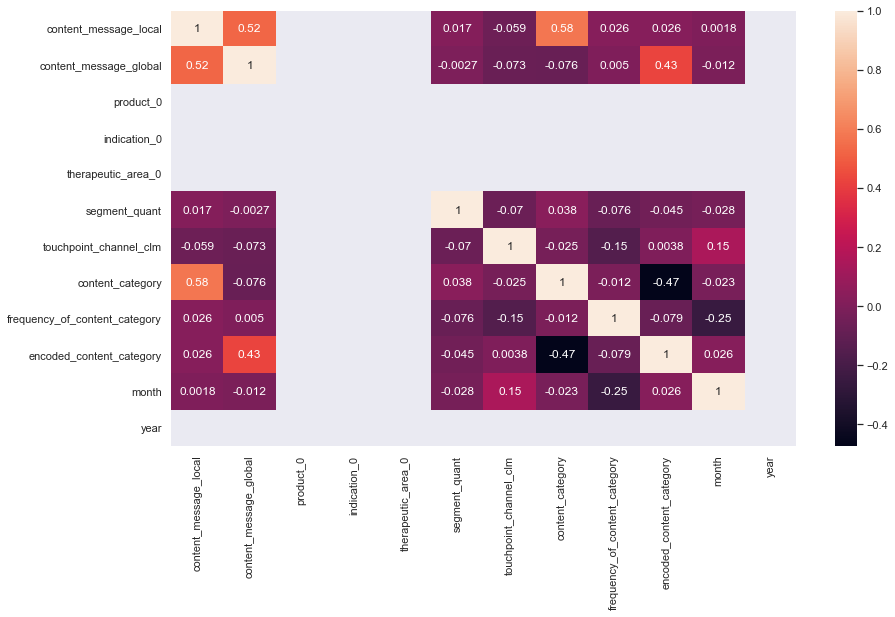

In [307]:
print('Skyrizi_PS')
sns.heatmap(new_data1.corr(), annot=True)

Skyrizi_KAM


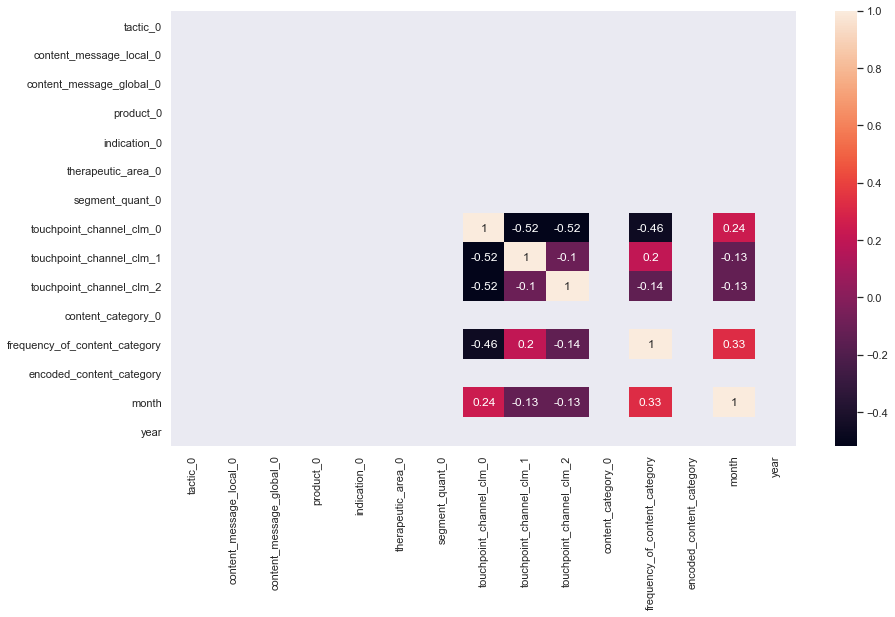

In [308]:
print('Skyrizi_KAM')
sns.heatmap(new_data2.corr(), annot=True)

In [309]:
print('Skyrizi_PS')
new_data1.columns

Skyrizi_PS


Index(['content_message_local', 'content_message_global', 'product_0',
       'indication_0', 'therapeutic_area_0', 'segment_quant',
       'touchpoint_channel_clm', 'content_category',
       'frequency_of_content_category', 'encoded_content_category', 'month',
       'year'],
      dtype='object')

In [310]:
print('Skyrizi_KAM')
new_data2.columns

Skyrizi_KAM


Index(['tactic_0', 'content_message_local_0', 'content_message_global_0',
       'product_0', 'indication_0', 'therapeutic_area_0', 'segment_quant_0',
       'touchpoint_channel_clm_0', 'touchpoint_channel_clm_1',
       'touchpoint_channel_clm_2', 'content_category_0',
       'frequency_of_content_category', 'encoded_content_category', 'month',
       'year'],
      dtype='object')

In [311]:
def standardscaler(data, cols = None):
    ''' 
    It is a standard normalization technique use when using machine learning models that assusme a normal/gaussian distribution.
    Models like Linear Regression, Gaussian Naive Bayes etc.
    -------------
        data: DataFrame, named Series
            Data set to perform operation on. It advisable not to scale/normalise the target variable.
        col: list of str
            columns in form of a list to scale/normalise. If not parsed, it scales/normalises the entire dataframe
        Returns:
    --------
        DataFrame of the scaled/normalised data/columns.
        
    It is used in the scale_normalise_data. It can also be used alone.
     '''
    if cols is not None:
        
        s_scaler = StandardScaler()
        data[cols] = s_scaler.fit_transform(data[cols])
        
        
    else:
        col_names = data.columns
        s_scaler = StandardScaler()
        df_s = s_scaler.fit_transform(data)
        data = pd.DataFrame(df_s, columns=col_names)
    
    return data

In [312]:
import statsmodels.api as sm
y = new_data1['frequency_of_content_category'].reset_index()
X = standardscaler(new_data1.drop('frequency_of_content_category', axis=1))

model = sm.OLS(y, X)
results = model.fit()
results.params

,0,1
content_message_local,8.448698e+01,6.603592e+00
content_message_global,-3.167148e+00,-1.354123e+00
product_0,-1.355118e-14,2.166107e-16
indication_0,1.750567e-14,1.391689e-15
therapeutic_area_0,-2.655612e-14,6.205514e-16
segment_quant,1.124857e+01,-4.535858e+00
touchpoint_channel_clm,-3.652720e-01,-5.815895e+00
content_category,7.680482e-01,-8.101704e+00
encoded_content_category,4.296551e+00,-7.129854e+00
month,1.899404e+02,-1.160197e+01


## Analysis of Content Message Concat

In [313]:
grouped_data['product_id'].value_counts()

a00G000000URPpNIAX    1605
a00G000000URPpGIAX    1581
a00G000000URPpMIAX    1548
a00G000000URPppIAH    1330
a00G000000URPpkIAH    1277
                      ... 
a00G000000UTNUnIAP       1
a00G000000UTNUWIA5       1
a00G000000UTb2hIAD       1
a000Y00001Cirg6QAB       1
a00G000000UTNUUIA5       1
Name: product_id, Length: 191, dtype: int64

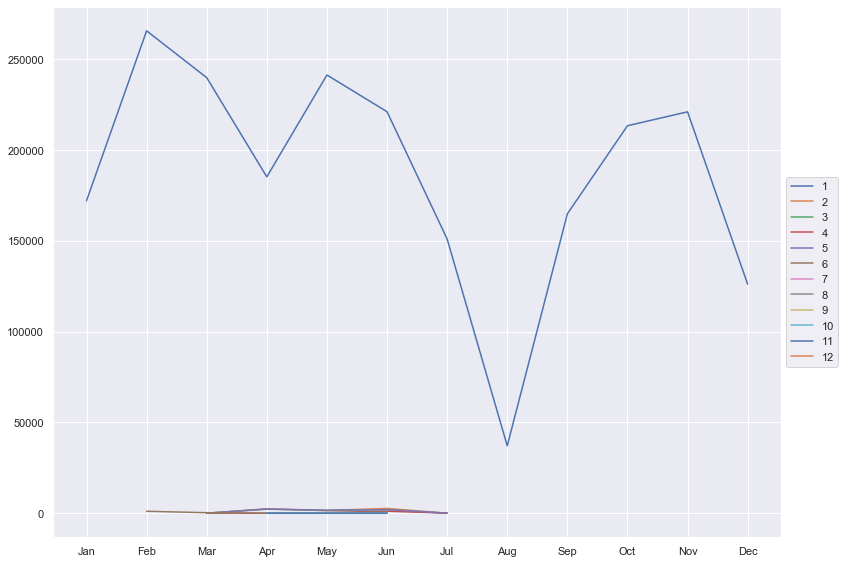

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime



df1 = grouped_data[['encoded_content_category','frequency_of_content_category','monthyear']]
df1.index = df1['monthyear']
pt = pd.pivot_table(df1, index=df1.index.month, columns=df1['encoded_content_category'], aggfunc='sum')['frequency_of_content_category']

ax = plt.figure().add_subplot(111)
ax.plot(pt)

ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels) #add monthlabels to the xaxis

ax.legend(pt.columns.tolist(), loc='center left', bbox_to_anchor=(1, .5)) #add the column names as legend.
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [315]:
counter = 1
mapper = dict()
for x in list_of_diff_content_categories:
    mapper.update( {x : f'content_category_{counter}'} )
    counter = counter + 1

In [316]:
grouped_data['encoded_content_category'] = grouped_data['content_category'].map(mapper)

In [317]:
grouped_data['encoded_content_category']

0        content_category_1
1        content_category_1
2        content_category_1
3        content_category_1
4        content_category_1
                ...        
23404    content_category_1
23405    content_category_1
23406    content_category_1
23407    content_category_1
23408    content_category_1
Name: encoded_content_category, Length: 23409, dtype: object

In [318]:
grouped_data['Date'] = grouped_data['monthyear'].values.astype('datetime64[M]')

In [319]:
grouped_data['product_id'].value_counts()

a00G000000URPpNIAX    1605
a00G000000URPpGIAX    1581
a00G000000URPpMIAX    1548
a00G000000URPppIAH    1330
a00G000000URPpkIAH    1277
                      ... 
a00G000000UTNUnIAP       1
a00G000000UTNUWIA5       1
a00G000000UTb2hIAD       1
a000Y00001Cirg6QAB       1
a00G000000UTNUUIA5       1
Name: product_id, Length: 191, dtype: int64

## Content Message Concat Analysis for Product a00G000000URPpNIAX

In [320]:
df1 = grouped_data[grouped_data['product_id']=='a00G000000URPpNIAX']

In [321]:
hue_order = list(dict(df1['encoded_content_category'].value_counts()).keys())

In [322]:
df1['encoded_content_category'].value_counts()

content_category_1    1605
Name: encoded_content_category, dtype: int64

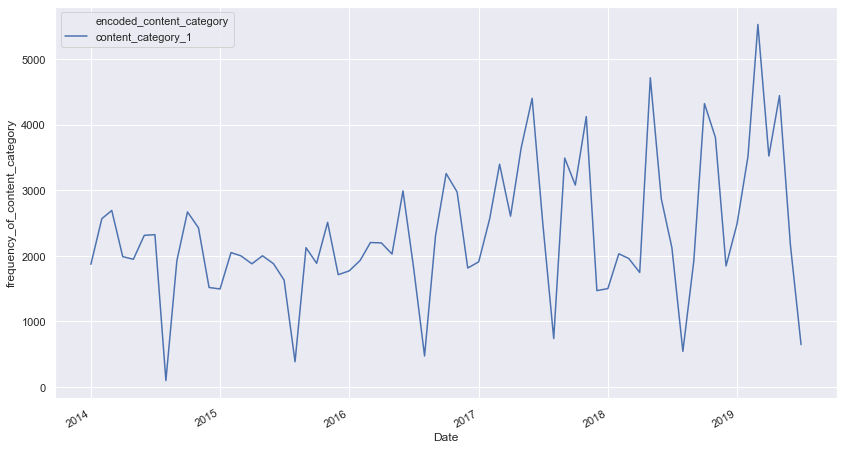

In [323]:
fig, ax = plt.subplots()
sns.lineplot(data=df1, x='Date', y='frequency_of_content_category', hue='encoded_content_category', ax=ax, estimator='sum',ci = None)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [324]:
df1.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2014-01,1872
2014-02,2569
2014-03,2694
2014-04,1990
2014-05,1949
...,...
2019-03,5533
2019-04,3525
2019-05,4448


## Content Message Concat Analysis for Product a00G000000URPpGIAX

In [325]:
df2 = grouped_data[grouped_data['product_id']=='a00G000000URPpGIAX']

In [326]:
len(list(dict(df2['encoded_content_category'].value_counts()).keys()))

1

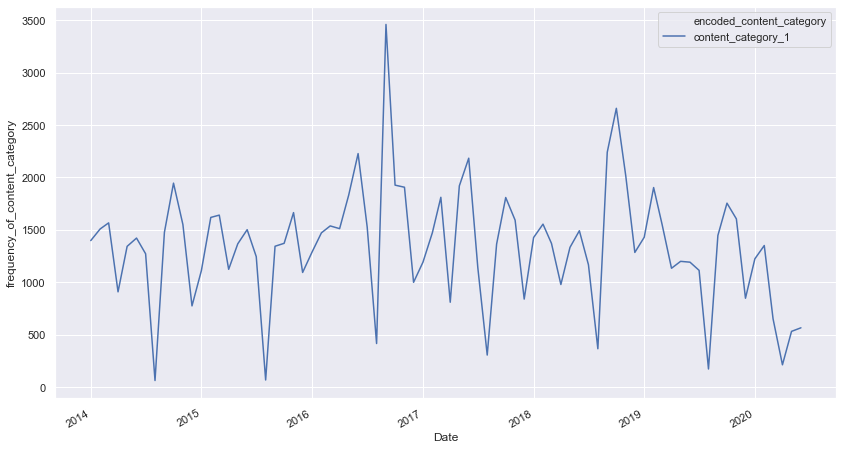

In [327]:
fig, ax = plt.subplots()
sns.lineplot(data=df2, x='Date', y='frequency_of_content_category', hue='encoded_content_category', ax=ax, estimator='sum',ci = None)
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [328]:
df2.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2014-01,1397
2014-02,1508
2014-03,1566
2014-04,908
2014-05,1342
...,...
2020-02,1350
2020-03,651
2020-04,212


## Content Message Concat Analysis for Product a00G000000URPpMIAX

In [329]:
df3 = grouped_data[grouped_data['product_id']=='a00G000000URPpMIAX']

In [330]:
len(list(dict(df3['encoded_content_category'].value_counts()).keys()))

1

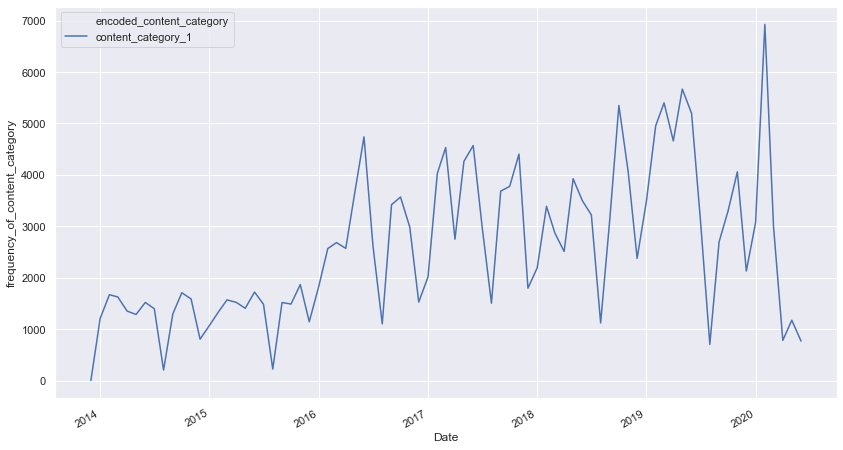

In [331]:
fig, ax = plt.subplots()
sns.lineplot(data=df3, x='Date', y='frequency_of_content_category',ci = None, hue='encoded_content_category', ax=ax, estimator='sum')
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [332]:
df3.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2013-12,4
2014-01,1210
2014-02,1672
2014-03,1628
2014-04,1354
...,...
2020-02,6925
2020-03,2990
2020-04,785


## Content Message Concat Analysis for Product a00G000000URPppIAH

In [333]:
df4 = grouped_data[grouped_data['product_id']=='a00G000000URPppIAH']

In [334]:
len(list(dict(df4['encoded_content_category'].value_counts()).keys()))

1

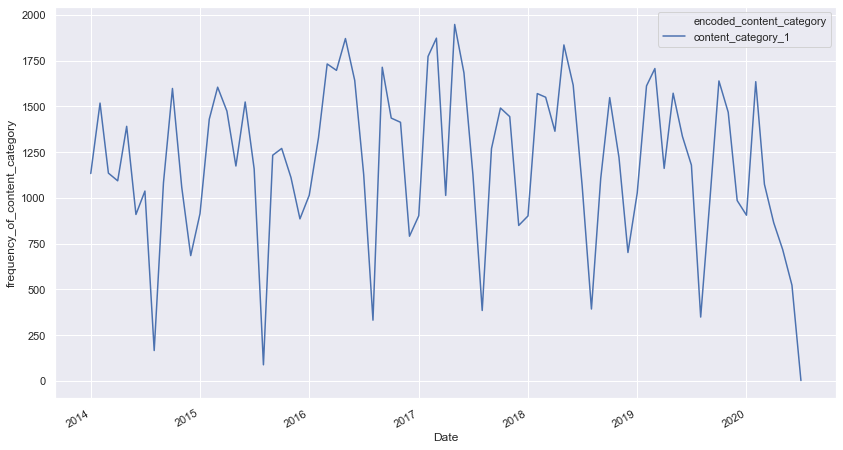

In [335]:
fig, ax = plt.subplots()
sns.lineplot(data=df4, x='Date', y='frequency_of_content_category',ci = None, hue='encoded_content_category', ax=ax, estimator='sum')
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [336]:
df4.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2014-01,1133
2014-02,1518
2014-03,1135
2014-04,1093
2014-05,1391
...,...
2020-03,1074
2020-04,864
2020-05,717


##  Content Message Concat Analysis for Product a00G000000URPpkIAH

In [337]:
df5 = grouped_data[grouped_data['product_id']=='a00G000000URPpkIAH']

In [338]:
len(list(dict(df5['encoded_content_category'].value_counts()).keys()))

1

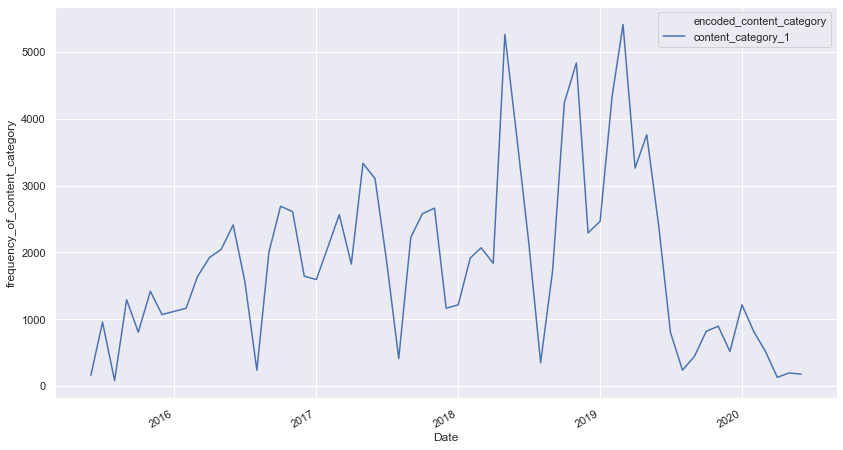

In [339]:
fig, ax = plt.subplots()
sns.lineplot(data=df5, x='Date', y='frequency_of_content_category',ci = None, hue='encoded_content_category', ax=ax, estimator='sum')
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [340]:
df5.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2015-06,160
2015-07,954
2015-08,81
2015-09,1291
2015-10,804
...,...
2020-02,807
2020-03,521
2020-04,128


##  Content Message Concat Analysis for Product a001v00001wbtlnAAA

In [341]:
df6 = grouped_data[grouped_data['product_id']=='a001v00001wbtlnAAA']

In [342]:
len(list(dict(df6['encoded_content_category'].value_counts()).keys()))

10

In [343]:
dict(df6['encoded_content_category'].value_counts())

{'content_category_2': 191,
 'content_category_5': 186,
 'content_category_3': 167,
 'content_category_1': 58,
 'content_category_7': 57,
 'content_category_4': 37,
 'content_category_6': 31,
 'content_category_10': 8,
 'content_category_11': 4,
 'content_category_12': 2}

In [241]:
value_list = ['content_category_1',
 'content_category_2',
 'content_category_3',
 'content_category_4',
 'content_category_5']
df_1 = df6[df6['encoded_content_category'].isin(value_list)]

In [242]:
value_list = ['content_category_6',
 'content_category_7',
 'content_category_10',
 'content_category_11',
 'content_category_12']
df_2 = df6[df6['encoded_content_category'].isin(value_list)]

In [243]:
col = [df_1, df_2]

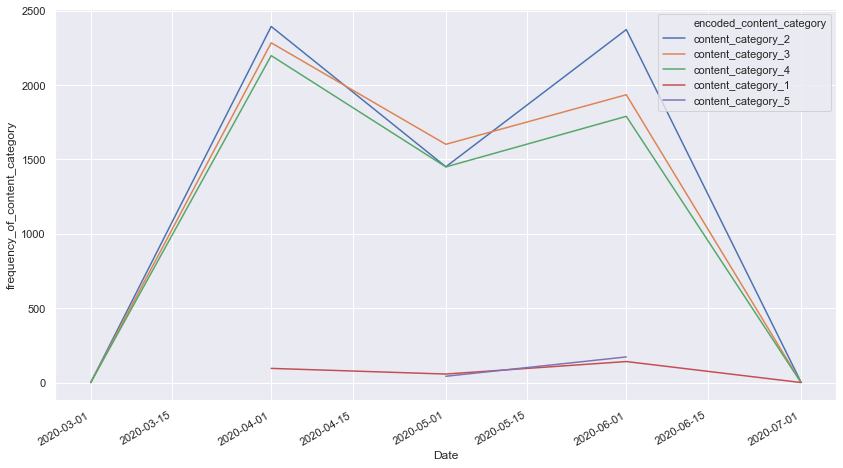

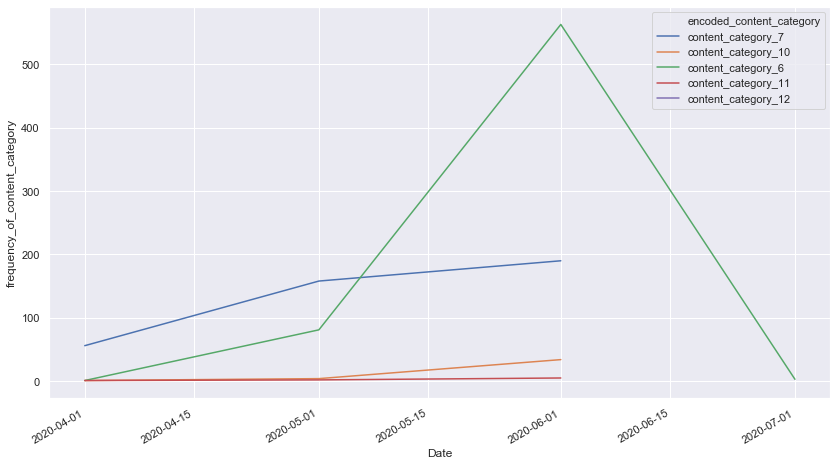

In [244]:
for x in col:
    fig, ax = plt.subplots()
    sns.lineplot(data=x, x='Date', y='frequency_of_content_category', hue='encoded_content_category', ax=ax, estimator='sum',ci = None)
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
    fig.autofmt_xdate()

In [245]:
df6.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1,content_category_10,content_category_11,content_category_12,content_category_2,content_category_3,content_category_4,content_category_5,content_category_6,content_category_7
monthyear,,,,,,,,,,
2020-03,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
2020-04,96.0,1.0,1.0,NaN,2394.0,2284.0,2198.0,NaN,1.0,56.0
2020-05,58.0,4.0,2.0,2.0,1451.0,1602.0,1450.0,43.0,81.0,158.0
2020-06,142.0,34.0,5.0,NaN,2373.0,1935.0,1790.0,173.0,563.0,190.0
2020-07,1.0,NaN,NaN,NaN,5.0,2.0,2.0,NaN,3.0,NaN


##  Content Message Concat Analysis for Product Skyrizi_KAM

In [246]:
df7 = grouped_data[grouped_data['product']=='Skyrizi_KAM']

In [247]:
df7

,product_id,monthyear,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,tactic,account_id,content_category,frequency_of_content_category,encoded_content_category,month,year,Date
94099,a001v000022LcG1AAK,2020-04,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,E-mail@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,60,content_category_1,4,2020,2020-04-01
94100,a001v000022LcG1AAK,2020-04,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Telephone@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,45,content_category_1,4,2020,2020-04-01
94101,a001v000022LcG1AAK,2020-04,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Virtual/Video@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,4,content_category_1,4,2020,2020-04-01
94102,a001v000022LcG1AAK,2020-05,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,E-mail@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,246,content_category_1,5,2020,2020-05-01
94103,a001v000022LcG1AAK,2020-05,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Face to Face@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,4,content_category_1,5,2020,2020-05-01
94104,a001v000022LcG1AAK,2020-05,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Telephone@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,374,content_category_1,5,2020,2020-05-01
94105,a001v000022LcG1AAK,2020-05,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Virtual/Video@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,131,content_category_1,5,2020,2020-05-01
94106,a001v000022LcG1AAK,2020-06,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,E-mail@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,207,content_category_1,6,2020,2020-06-01
94107,a001v000022LcG1AAK,2020-06,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Face to Face@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,9,content_category_1,6,2020,2020-06-01
94108,a001v000022LcG1AAK,2020-06,NoMessage,NoMessage,Skyrizi_KAM,No indication,Dermatology,B2,Telephone@0,NoMessage SGM NoMessage,001G000001tCWu5IAG,Unknown,339,content_category_1,6,2020,2020-06-01


In [248]:
len(list(dict(df7['encoded_content_category'].value_counts()).keys()))

1

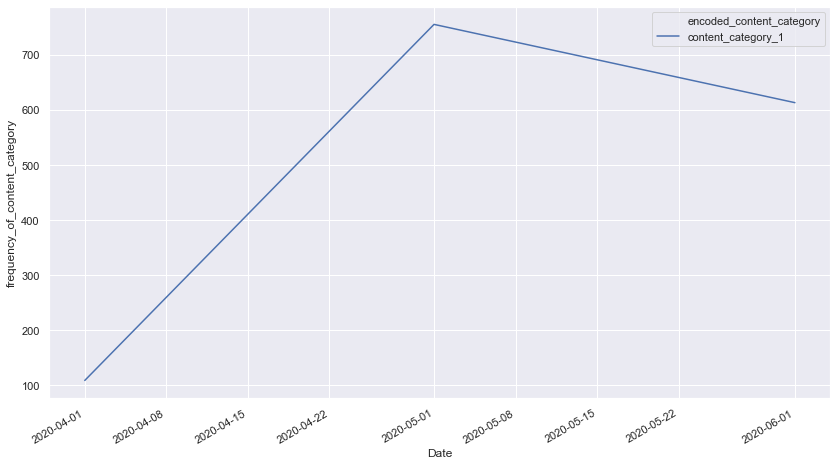

In [250]:
fig, ax = plt.subplots()
sns.lineplot(data=df7, x='Date', y='frequency_of_content_category',ci = None, hue='encoded_content_category', ax=ax, estimator='sum')
#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
fig.autofmt_xdate()

In [251]:
df7.groupby(['monthyear', 'encoded_content_category'])['frequency_of_content_category'].sum().unstack()

encoded_content_category,content_category_1
monthyear,
2020-04,109
2020-05,755
2020-06,613


##  Content Message Concat Analysis for Product Skyrizi_PS

In [252]:
df8 = grouped_data[grouped_data['product']=='Skyrizi_PS']

In [253]:
df8

,product_id,monthyear,content_message_local,content_message_global,product,indication,therapeutic_area,segment_quant,touchpoint_channel_clm,tactic,account_id,content_category,frequency_of_content_category,encoded_content_category,month,year,Date
72578,a001v00001wbtlnAAA,2020-03,Aclaramiento completo duradero,Durable complete clearance,Skyrizi_PS,Psoriasis (PS),Dermatology,C3,E-mail@0,Aclaramiento completo duradero SGM Durable com...,001G000001t30WqIAI,Efficacy,1,content_category_2,3,2020,2020-03-01
72579,a001v00001wbtlnAAA,2020-03,Facilidad,Reliable 3-month dosing regardless of baseline...,Skyrizi_PS,Psoriasis (PS),Dermatology,C3,E-mail@0,Facilidad SGM Reliable 3-month dosing regardle...,001G000001t30WqIAI,Dosing and Administration,1,content_category_3,3,2020,2020-03-01
72580,a001v00001wbtlnAAA,2020-03,Seguridad,SKYRIZI/IL-23 MOA,Skyrizi_PS,Psoriasis (PS),Dermatology,C3,E-mail@0,Seguridad SGM SKYRIZI/IL-23 MOA,001G000001t30WqIAI,Mode of Action,1,content_category_4,3,2020,2020-03-01
72581,a001v00001wbtlnAAA,2020-04,Aclaramiento completo duradero,Durable complete clearance,Skyrizi_PS,Psoriasis (PS),Dermatology,A1,E-mail@0,Aclaramiento completo duradero SGM Durable com...,001G000001t2RGuIAM,Efficacy,2,content_category_2,4,2020,2020-04-01
72582,a001v00001wbtlnAAA,2020-04,Aclaramiento completo duradero,Durable complete clearance,Skyrizi_PS,Psoriasis (PS),Dermatology,A1,E-mail@0,Aclaramiento completo duradero SGM Durable com...,001G000001t2RVxIAM,Efficacy,1,content_category_2,4,2020,2020-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84566,a001v00001wbtlnAAA,2020-07,Campaña Nada lo cambia todo,Nothing is Everything/campaign summary,Skyrizi_PS,Psoriasis (PS),Dermatology,B2,Face to Face@1,Campaña Nada lo cambia todo SGM Nothing is Eve...,001G000001t356FIAQ,AbbVie or Brand Value,3,content_category_6,7,2020,2020-07-01
84567,a001v00001wbtlnAAA,2020-07,Eficacia y tolerabilidad vs otros MOAs,SKYRIZI/IL-23 MOA,Skyrizi_PS,Psoriasis (PS),Dermatology,B2,Face to Face@1,Eficacia y tolerabilidad vs otros MOAs SGM SKY...,001G000001t356FIAQ,Mode of Action,1,content_category_4,7,2020,2020-07-01
84568,a001v00001wbtlnAAA,2020-07,Facilidad,Reliable 3-month dosing regardless of baseline...,Skyrizi_PS,Psoriasis (PS),Dermatology,B2,Face to Face@1,Facilidad SGM Reliable 3-month dosing regardle...,001G000001t356FIAQ,Dosing and Administration,1,content_category_3,7,2020,2020-07-01
84569,a001v00001wbtlnAAA,2020-07,NoMessage,NoMessage,Skyrizi_PS,Psoriasis (PS),Dermatology,B2,Face to Face@0,NoMessage SGM NoMessage,001G000001t3BANIA2,Unknown,1,content_category_1,7,2020,2020-07-01


In [254]:
len(list(dict(df8['encoded_content_category'].value_counts()).keys()))

10

In [255]:
dict(df8['encoded_content_category'].value_counts())

{'content_category_3': 3831,
 'content_category_2': 3796,
 'content_category_4': 3592,
 'content_category_6': 228,
 'content_category_7': 222,
 'content_category_1': 153,
 'content_category_5': 152,
 'content_category_10': 11,
 'content_category_11': 6,
 'content_category_12': 2}

In [256]:
value_list = ['content_category_1',
 'content_category_2',
 'content_category_3',
 'content_category_4',
 'content_category_5']
df_1 = df8[df8['encoded_content_category'].isin(value_list)]

In [257]:
value_list = ['content_category_6',
 'content_category_7',
 'content_category_10',
 'content_category_11',
 'content_category_12']
df_2 = df8[df8['encoded_content_category'].isin(value_list)]

In [258]:
col = [df_1, df_2]

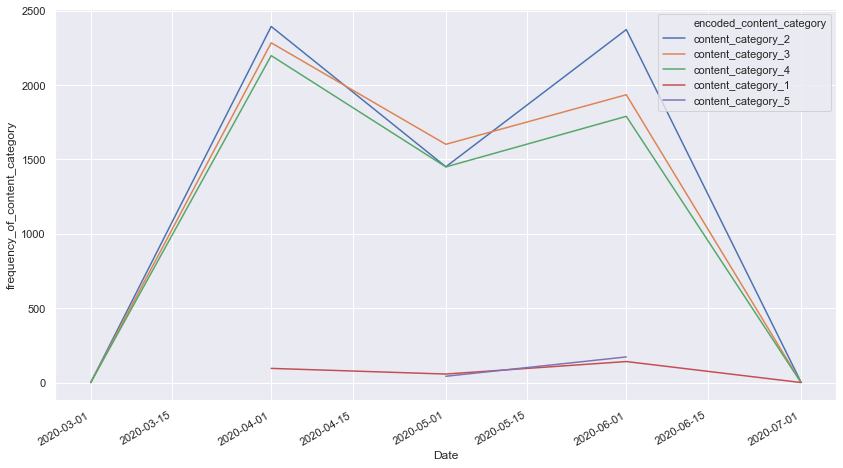

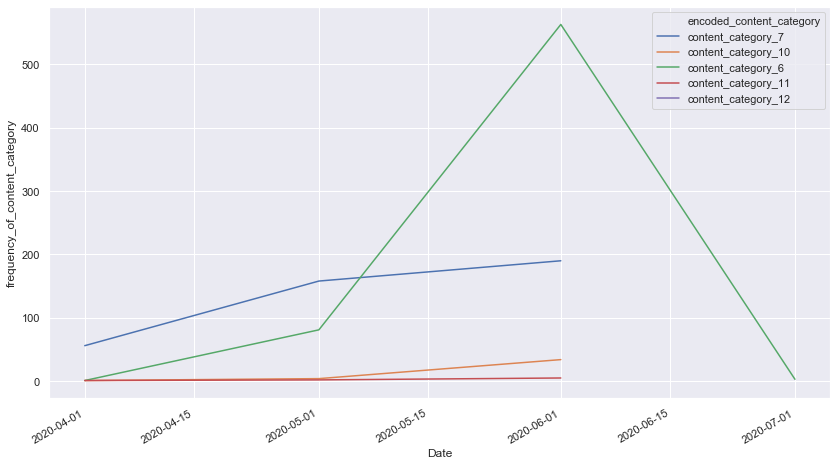

In [259]:
for x in col:
    fig, ax = plt.subplots()
    sns.lineplot(data=x, x='Date', y='frequency_of_content_category', hue='encoded_content_category', ax=ax, estimator='sum',ci = None)
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%M"))
    fig.autofmt_xdate()

### Tactic and Actual Message

In [260]:
pd.DataFrame(mapper.items(), columns=['content_category', 'encoded_content_category'])

,content_category,encoded_content_category
0,Unknown,content_category_1
1,Efficacy,content_category_2
2,Dosing and Administration,content_category_3
3,Mode of Action,content_category_4
4,Key Message Category does not apply,content_category_5
5,AbbVie or Brand Value,content_category_6
6,Adherence,content_category_7
7,Safety,content_category_8
8,Disease Information,content_category_9
9,Patient Support Programs,content_category_10
